

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
 Unsupervised Learning<br>


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset

In [ ]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,902.000000,902.000000,902.000000,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,36.832594,797.782705,9.433481,2.952328,1.0,1014.508869,2.688470,67.124169,2.721729,2.021064,...,2.694013,80.0,0.804878,11.043237,2.815965,2.743902,6.794900,4.144124,2.144124,3.936807
std,9.306933,405.292650,8.248331,1.041295,0.0,608.153731,1.103652,20.558087,0.710750,1.093112,...,1.083397,0.0,0.862113,7.810982,1.309680,0.708159,6.089151,3.647824,3.108697,3.480307
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,459.750000,2.000000,2.000000,1.0,477.250000,2.000000,49.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,801.500000,7.000000,3.000000,1.0,1001.500000,3.000000,67.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1156.250000,15.000000,4.000000,1.0,1553.750000,4.000000,85.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
null_values = df.isnull().sum()
print(null_values[null_values>0])

Series([], dtype: int64)


Attrition
No     713
Yes    189
Name: count, dtype: int64


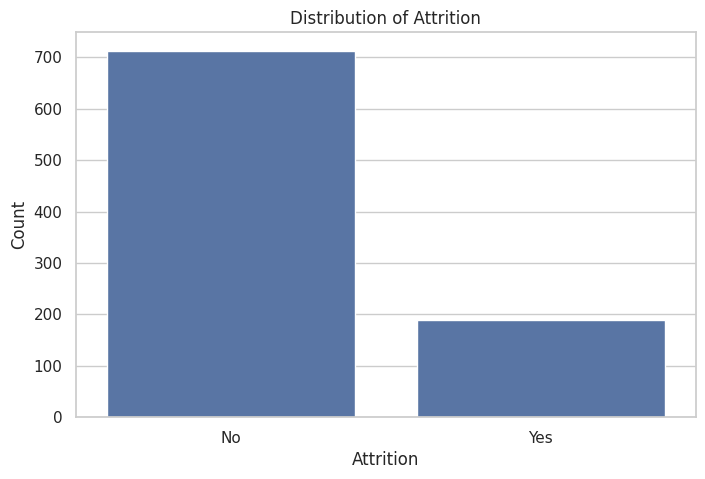

In [ ]:
print(df['Attrition'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [ ]:
unique_values = df.nunique()

print("Number of Unique Values for Each Column:")
print(unique_values)

columns_to_remove = unique_values[unique_values < 2].index.tolist()
df = df.drop(columns=columns_to_remove)

Number of Unique Values for Each Column:
Age                          42
Attrition                     2
BusinessTravel                3
DailyRate                   653
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber              902
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               853
MonthlyRate                 888
NumCompaniesWorked           10
Over18                        1
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7

Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

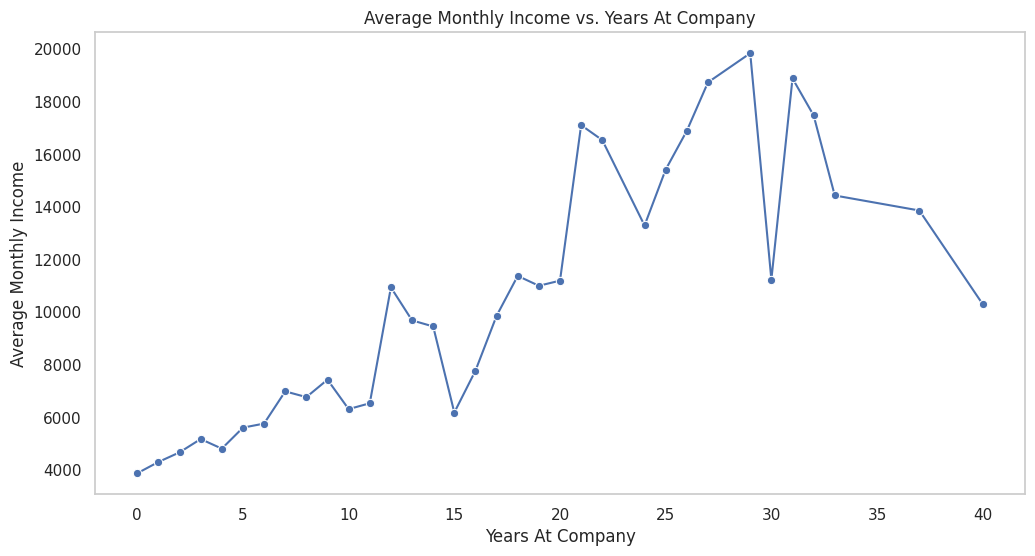


Department with the Highest Average Income:
Department             Sales
MonthlyIncome    6817.394366
Name: 2, dtype: object

Department with the Lowest Average Income:
Department       Research & Development
MonthlyIncome               6073.644444
Name: 1, dtype: object


In [ ]:
average_income_by_years = df.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_income_by_years, x='YearsAtCompany', y='MonthlyIncome', marker='o')
plt.title('Average Monthly Income vs. Years At Company')
plt.xlabel('Years At Company')
plt.ylabel('Average Monthly Income')
plt.grid()
plt.show()


average_income_by_department = df.groupby('Department')['MonthlyIncome'].mean().reset_index()
highest_income_department = average_income_by_department.loc[average_income_by_department['MonthlyIncome'].idxmax()]
lowest_income_department = average_income_by_department.loc[average_income_by_department['MonthlyIncome'].idxmin()]

print("\nDepartment with the Highest Average Income:")
print(highest_income_department)

print("\nDepartment with the Lowest Average Income:")
print(lowest_income_department)

# Data Preprocessing

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [ ]:
label_encoder = LabelEncoder()


encoded_df = df.copy()

for column in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
encoded_df.head()
df = encoded_df

In [ ]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN) Model

Implement KNN model from scratch.

In [ ]:
import numpy as np
from collections import Counter

class CustomKNN:
    def __init__(self, k):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # Store the number of neighbors (k)
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        # Store training data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Euclidean distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        euclidean_distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(euclidean_distances)[:self.k]

        k_labels = [self.y_train[i] for i in k_indices]

        most_common_label = Counter(k_labels).most_common(1)
        return most_common_label[0][0]


Fit and test your model using different k values and then choose the best one.

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []



for k in k_values:
    knn = CustomKNN(k=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_custom = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_custom)
    accuracies.append(accuracy)

    print(f'k: {k} - Accuracy: {accuracy}')

best_accuracy = max(accuracies)
bestk = k_values[accuracies.index(best_accuracy)]
Best_custom_model = CustomKNN(k=bestk)
print(f'\nBest k: {bestk} - Accuracy: {best_accuracy}')

k: 1 - Accuracy: 0.8081180811808119
k: 3 - Accuracy: 0.8007380073800738
k: 5 - Accuracy: 0.8007380073800738
k: 7 - Accuracy: 0.8265682656826568
k: 9 - Accuracy: 0.8302583025830258
k: 11 - Accuracy: 0.8154981549815498
k: 13 - Accuracy: 0.8265682656826568
k: 15 - Accuracy: 0.8118081180811808

Best k: 9 - Accuracy: 0.8302583025830258


In [ ]:
Best_custom_model.fit(X_train_scaled, y_train)


y_pred_best = Best_custom_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy}')

print("\nReport of Best Custom Model:")
print(classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.8302583025830258

Report of Best Custom Model:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       216
           1       0.85      0.20      0.32        55

    accuracy                           0.83       271
   macro avg       0.84      0.60      0.61       271
weighted avg       0.83      0.83      0.79       271



Visualize the confusion matrix for KNN predictions

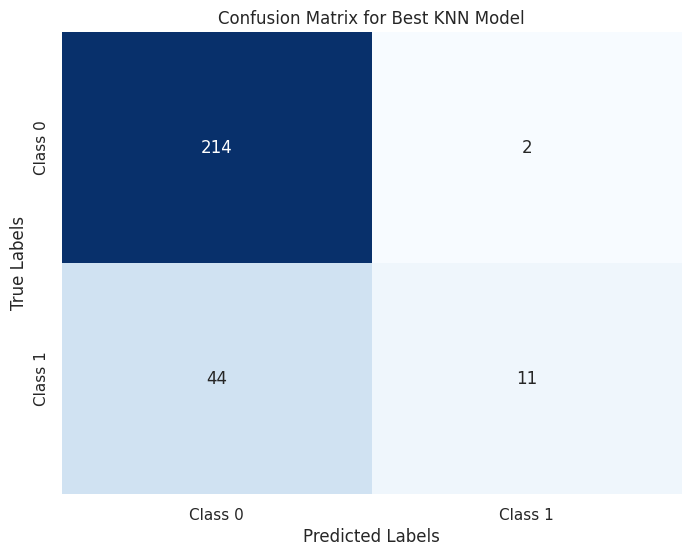

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix for Best KNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Evaluation
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [ ]:
eval_df = pd.read_csv('test.csv')

X_eval_scaled = scaler.transform(eval_df)
y_pred_eval = Best_custom_model.predict(X_eval_scaled)

Save the results in a DataFrame

In [ ]:
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model

Implement a random forest model using sklearn.

In [ ]:
# TODO: Implement the Random Forest model
rf = RandomForestClassifier(random_state=42)

# TODO: Set up a hyperparameter tuning process for Random Forest using GridSearchCV
# Suggested parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
# GridSearchCV with Random Forest
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)

# TODO: Fit the GridSearchCV on the training data to find the best parameters
# Use rf_cv.fit() with the training data
rf_cv.fit(X_train_scaled, y_train)

# TODO: Use the best Random Forest model for predictions on the test data
# Use rf_cv.best_estimator_ and predict()
y_pred_rf = rf_cv.best_estimator_.predict(X_test_scaled)

# TODO: Print the Random Forest model accuracy and classification report using sklearn's metrics
# Use accuracy_score and classification_report
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {rf_accuracy}')

print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8339483394833949

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       216
           1       0.78      0.25      0.38        55

    accuracy                           0.83       271
   macro avg       0.81      0.62      0.64       271
weighted avg       0.83      0.83      0.80       271



Visualize the confusion matrix for Random Forest predictions

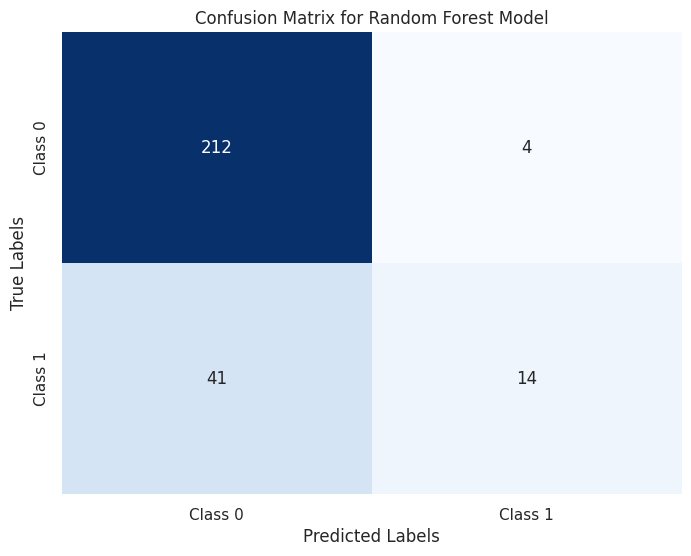

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

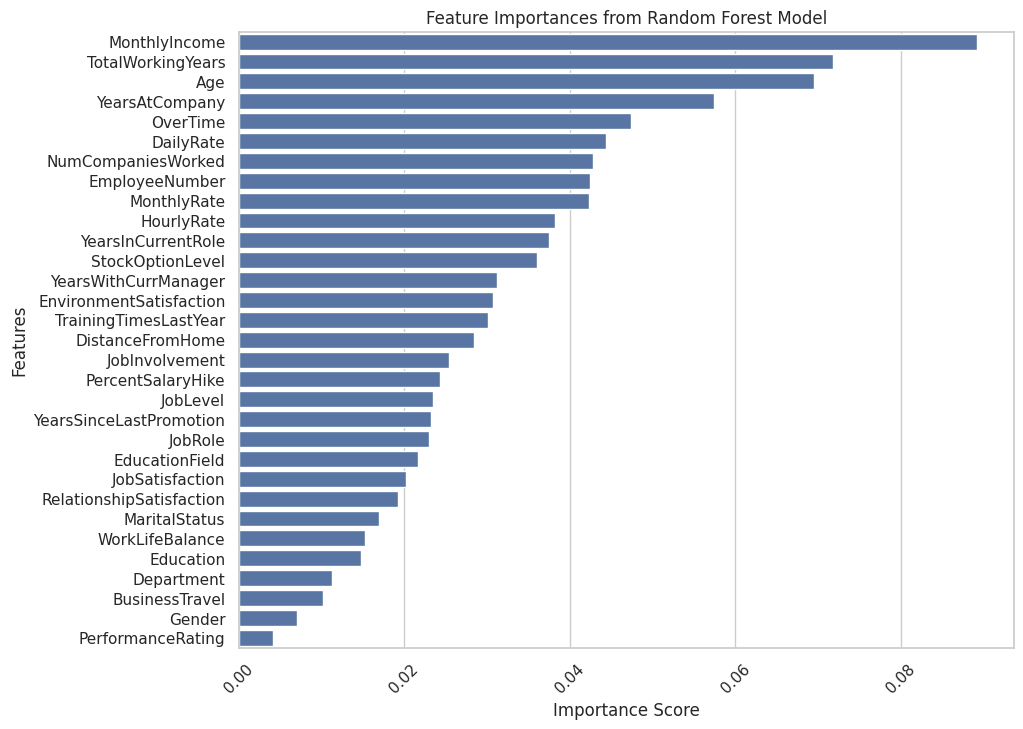

In [ ]:
# Get the feature importances from the trained Random Forest model
best_rf = rf_cv.best_estimator_
importances= best_rf.feature_importances_

sorted_indices = importances.argsort()[::-1]

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns[sorted_indices],
    'Importance': importances[sorted_indices]
})
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tick_params(axis='x', rotation=45)
plt.show()

# Bagging with KNN

In [ ]:
# TODO: Implement Bagging with KNN
# Use BaggingClassifier with KNeighborsClassifier as the base estimator
# Here we use the bestk value we found before
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)

# TODO: Fit the BaggingClassifier on the scaled training data
# Use bagging_knn.fit() with the training data
bagging_knn.fit(X_train_scaled, y_train)

# TODO: Use the trained Bagging model for predictions on the test data
# Use bagging_knn.predict()
y_pred_bagging_knn = bagging_knn.predict(X_test_scaled)

# TODO: Print the Bagging KNN model accuracy and classification report
# Use accuracy_score and classification_report
bagging_knn_accuracy = accuracy_score(y_test, y_pred_bagging_knn)
print(f'Bagging KNN Model Accuracy: {bagging_knn_accuracy}')

print("\nClassification Report for Bagging KNN Model:")
print(classification_report(y_test, y_pred_bagging_knn))

Bagging KNN Model Accuracy: 0.8265682656826568

Classification Report for Bagging KNN Model:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       216
           1       0.90      0.16      0.28        55

    accuracy                           0.83       271
   macro avg       0.86      0.58      0.59       271
weighted avg       0.84      0.83      0.77       271



Visualize the confusion matrix for Baggin KNN predictions

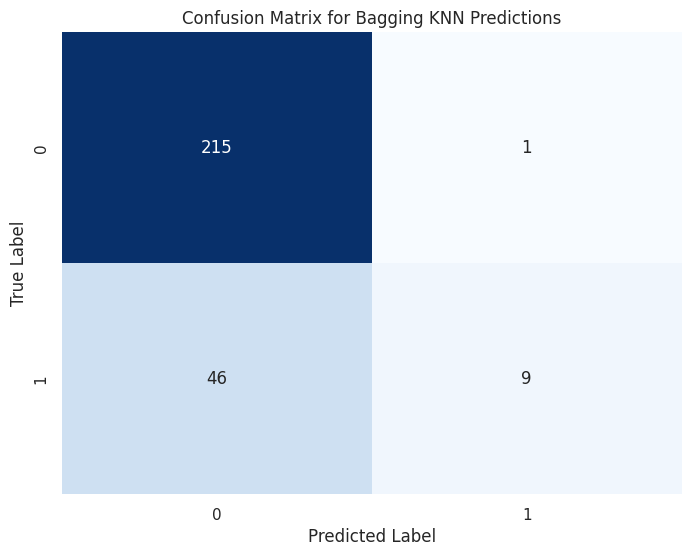

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_bagging_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Bagging KNN Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# AdaBoost Model

In [ ]:
adaboost = AdaBoostClassifier(random_state=42) # Warnings are because of this part and I didn't change that because you gave this line.

# TODO: Set up a hyperparameter tuning process for AdaBoost using GridSearchCV
# Suggested parameter grid: {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}
# GridSearchCV with AdaBoost
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)

# TODO: Fit the GridSearchCV on the training data to find the best parameters
# Use adaboost_cv.fit() with the training data
adaboost_cv.fit(X_train_scaled, y_train)

# TODO: Use the best AdaBoost model for predictions on the test data
# Use adaboost_cv.best_estimator_ and predict()
y_pred_ada = adaboost_cv.best_estimator_.predict(X_test_scaled)

# TODO: Print the AdaBoost model accuracy and classification report using sklearn's metrics
# Use accuracy_score and classification_report
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Model Accuracy:", accuracy_ada)
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Model Accuracy: 0.8339483394833949
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.90       216
           1       0.81      0.24      0.37        55

    accuracy                           0.83       271
   macro avg       0.82      0.61      0.64       271
weighted avg       0.83      0.83      0.80       271



Visualize the confusion matrix for AdaBoost predictions

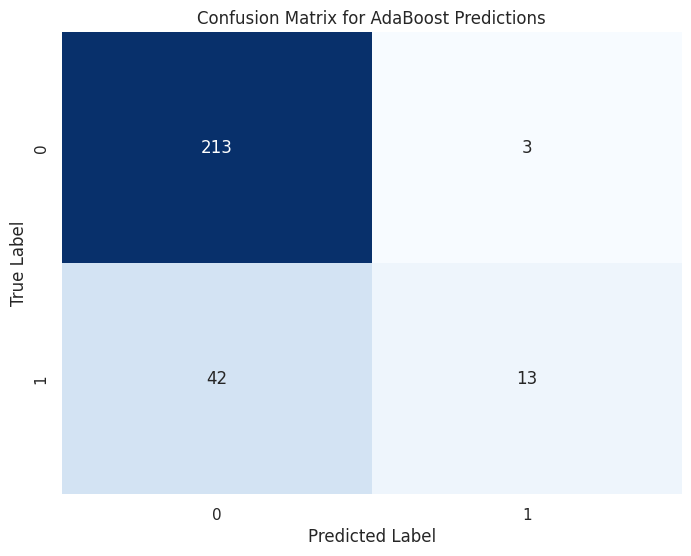

In [ ]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for AdaBoost Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Model Comparison

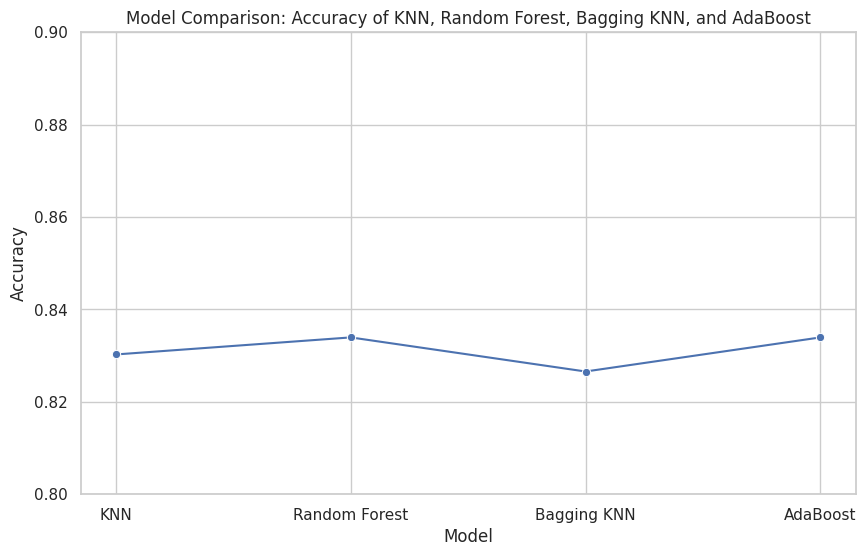

In [ ]:
model_accuracies = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost'],
    'Accuracy': [accuracy, rf_accuracy, bagging_knn_accuracy, accuracy_ada]
})
plt.figure(figsize=(10, 6))
sns.lineplot(data=model_accuracies, x='Model', y='Accuracy', marker='o')
plt.title("Model Comparison: Accuracy of KNN, Random Forest, Bagging KNN, and AdaBoost")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.8, 0.9)
plt.show()
